<a href="https://colab.research.google.com/github/giuliaries/MachineLearning/blob/main/PCA_on_IRIS_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Giulia Santoiemma](mailto:giulia.santoiemma@studenti.unipd.it) 2004775<br/>
Machine Learning<br/> 
Master Degree in Computer Science<br/>
10 December 2021

In [ ]:
# Import libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## The Iris Dataset

This is the [Iris dataset by sklearn](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [ ]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

display(pd.DataFrame(data=iris.data, columns=iris.feature_names))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X.shape

(150, 4)

## Preprocessing

In [ ]:
# Scale the data
scaled_features = StandardScaler().fit_transform(X)
scaled_features[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

##PCA with 3 components

In this exercise I use the PCA (Principal Component Analysis) technique to reduce the dimensionality of the dataset, in order to verify the different performances obtainable from the learning models in making the prediction of the relative target values.

I extract the three main components from the dataset: then the least important feature for classification is deleted.

Once the extractions have been made, I visualize the data on graphs, to study their spatial arrangement.

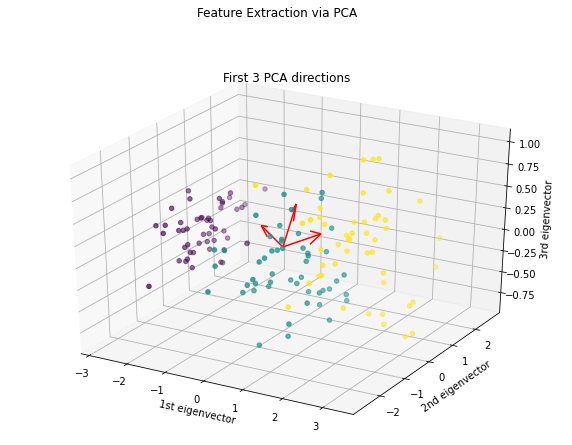

In [ ]:
# Plot the training points
def plot_pca_3(data, figsize, subplot, title):
  # Data visualization based on the 3 main components
  figure = plt.figure(1, figsize=figsize)
  figure.suptitle("Feature Extraction via PCA")
  ax = figure.add_subplot(subplot, projection="3d")
  ax.scatter(data.T[0], data.T[1], data.T[2], c=y)
  ax.quiver(np.mean(data.T[0]), np.mean(data.T[1]), np.mean(data.T[2]), pca.components_.T[0], pca.components_.T[1], pca.components_.T[2], color="red")
  ax.set_title(title)
  ax.set_xlabel("1st eigenvector")
  ax.set_ylabel("2nd eigenvector")
  ax.set_zlabel("3rd eigenvector")

# Plot the first three PCA dimensions
pca = PCA(n_components = 3)
pc3 = pca.fit_transform(scaled_features)
plot_pca_3(pc3, (10, 7), 111, "First 3 PCA directions")

plt.show()

In the graph created we can visualize the three main components, indicated by the three vectors in red.

Now, of these three components, I am going to visualize the two main ones: in the first case, I select the two components starting from the original normalized dataset, while in the second case I select the two components starting from the three prevoiusly extracted.

I will then evaluate if there is a better approach between the two, and if so what it is.

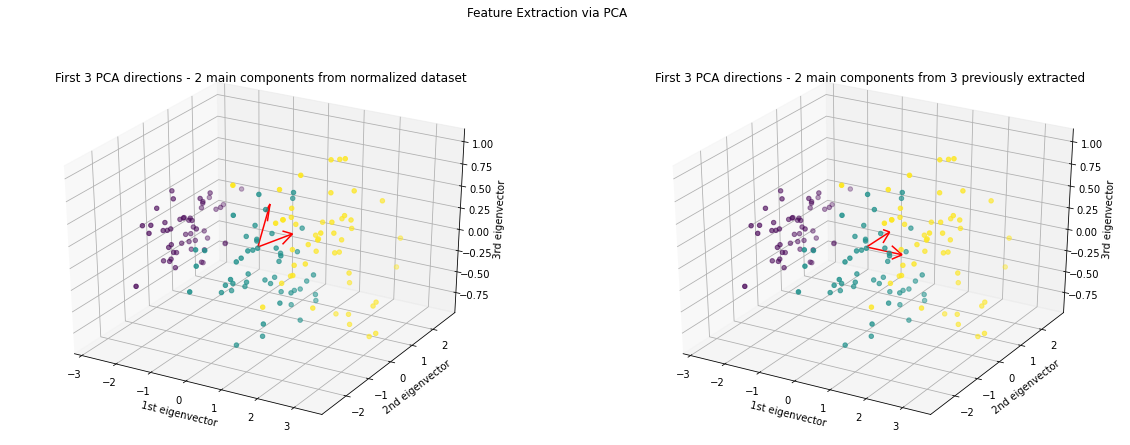

In [ ]:
# Data visualization based on the 3 main components 
# and the directions of the 2 main components extracted from the normalized dataset
pca = PCA(n_components = 2)
pc2 = pca.fit_transform(scaled_features)
plot_pca_3(pc3, (20, 7), 121, "First 3 PCA directions - 2 main components from normalized dataset")

# Data visualization based on the 3 main components 
# and the directions of the 2 main components extracted from the 3 previously extracted
pca = PCA(n_components = 2)
pc2_from3 = pca.fit_transform(pc3)
plot_pca_3(pc3, (20, 7), 122, "First 3 PCA directions - 2 main components from 3 previously extracted")

plt.show()

##PCA with 2 components

Now I extract the two main components I just selected.

I distinguish the two cases again: in the first case I extract the two components starting from the original normalized dataset, while in the second case I extract the two components starting from the three previously extracted.

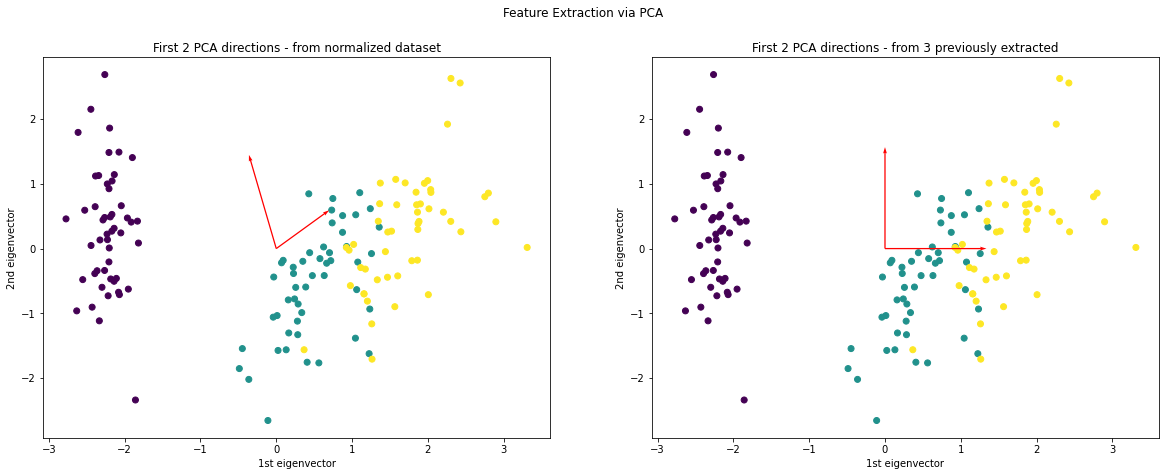

In [ ]:
# Plot the training points
def plot_pca_2(data, subplot, title):
  # Data visualization based on the 2 main components
  figure = plt.figure(1, figsize=(20, 7))
  figure.suptitle("Feature Extraction via PCA")
  ax = figure.add_subplot(subplot)
  ax.scatter(data.T[0], data.T[1], c=y)
  ax.quiver(np.mean(data.T[0]), np.mean(data.T[1]), pca.components_[0][0], pca.components_[1][0], color="red", scale=5, width=0.0025)
  ax.quiver(np.mean(data.T[0]), np.mean(data.T[1]), pca.components_[0][1], pca.components_[1][1], color="red", scale=5, width=0.0025)
  ax.set_title(title)
  ax.set_xlabel("1st eigenvector")
  ax.set_ylabel("2nd eigenvector")

# Extraction of the 2 main components starting from the normalized dataset
pca = PCA(n_components = 2)
pc2 = pca.fit_transform(scaled_features)
plot_pca_2(pc2, 121, "First 2 PCA directions - from normalized dataset")

# Extraction of the 2 main components starting from the 3 previously extracted
pca = PCA(n_components = 2)
pc2_from3 = pca.fit_transform(pc3)
plot_pca_2(pc2_from3, 122, "First 2 PCA directions - from 3 previously extracted")

plt.show()

##PCA with 1 component

Finally, I extract the single main component: in the first case starting from the original normalized dataset, in the second case starting from the two previously extracted components.

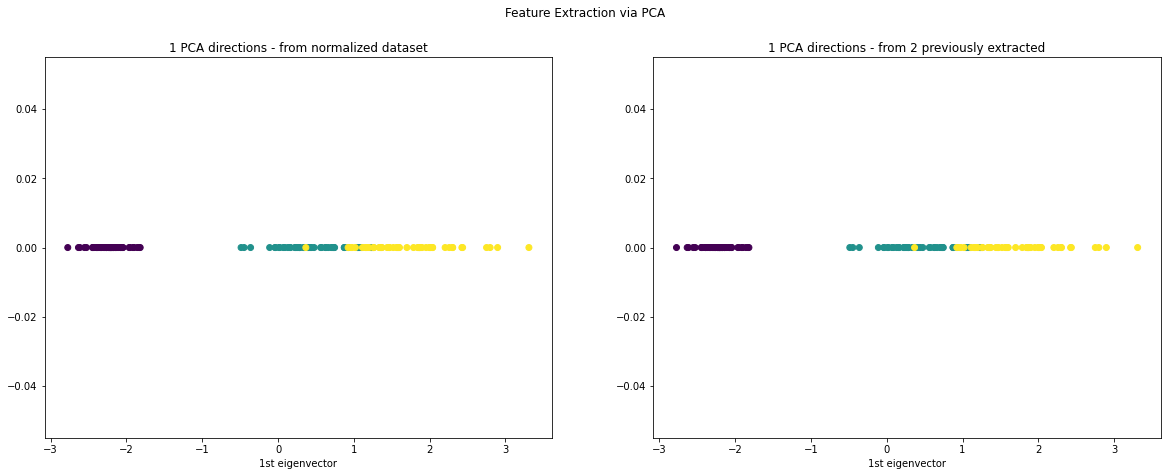

In [ ]:
# Plot the training points
def plot_pca_1(data, subplot, title):
  # Data visualization based on the 1 main component
  figure = plt.figure(1, figsize=(20, 7))
  figure.suptitle("Feature Extraction via PCA")
  ax = figure.add_subplot(subplot)
  ax.scatter(data.T[0], [0]*len(data.T[0]), c=y)
  #ax.quiver(np.mean(data.T[0]),  pca.components_[0][0], color="red", scale=5, width=0.0025)
  ax.set_title(title)
  ax.set_xlabel("1st eigenvector")

# Extraction of the 1 main component starting from the normalized dataset
pca = PCA(n_components = 1)
pc1 = pca.fit_transform(scaled_features)
plot_pca_1(pc1, 121, "1 PCA directions - from normalized dataset")

# Extraction of the 1 main component starting from the 2 previously extracted
pca = PCA(n_components = 1)
pc1_from2 = pca.fit_transform(pc2_from3)
plot_pca_1(pc1_from2, 122, "1 PCA directions - from 2 previously extracted")

plt.show()

## Multi Layer Perceptron

To evaluate the quality of the two different Feature Extraction strategies, I have trained the learning algorithms with the Neural Network.

Then I have verified how the quality of the prediction changes, depending on the model and preprocessing used.

To compare the performance I have used 3 metrics:

* Accuracy
* Precision
* Recall

In [ ]:
def addDataset(i, dataset, header):
  headers[i] = header
  X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(dataset, y, test_size=0.33, random_state=42)

headers = {0: "Neural Network"}

# Split each datasets into random train and test subsets
X_train, X_test, y_train, y_test = {}, {}, {}, {}

index = 0
addDataset(index, pc1, "MLP PCA\n 1 component")

index += 1
addDataset(index, pc1_from2, "MLP PCA\n 1 component\n from 2 comp.")

index += 1
addDataset(index, pc2, "MLP PCA\n 2 component")

index += 1
addDataset(index, pc2_from3, "MLP PCA\n 2 components\n from 3 comp.")

index += 1
addDataset(index, pc3, "MLP PCA\n 3 component")

index += 1
addDataset(index, scaled_features, "MLP normalized\n dataset")

index += 1
addDataset(index, X, "MLP original\n dataset")

In [ ]:
# Neural Network Classifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1500, alpha=1, tol=1e-8, learning_rate_init=.01)

report = [["𝜶 Accuracy"], ["𝝅 Precision"], ["𝝆 Recall"]]

# Foreach dataset
for i in range(len(headers)):

  # Fit the current model according to the given training dataset
  model.fit(X_train[i], y_train[i])

  # Predict the classification for the provided data (the test set)
  y_pred = model.predict(X_test[i])

  # Accuracy classification score.
  # In multilabel classification, this function computes subset accuracy: 
  # the set of labels predicted for a sample must exactly match the corresponding set of labels in y_test.
  # If normalized, the best value is 1 and the worst value is 0.
  report[0].append(accuracy_score(y_test[i], y_pred))

  # Compute the precision.
  # The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
  # The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
  # The best value is 1 and the worst value is 0.
  report[1].append(precision_score(y_test[i], y_pred, average="macro"))

  # Compute the recall.
  # The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
  # The recall is intuitively the ability of the classifier to find all the positive samples.
  # The best value is 1 and the worst value is 0.
  report[2].append(recall_score(y_test[i], y_pred, average="macro"))

# Show the results for the Neural Network Classifier
print(tabulate(report, headers=["Neural Network"] + list(headers.values()), tablefmt="rst"), "\n")

================  ==============  ===============  ==============  ===============  ==============  ================  ==============
Neural Network           MLP PCA          MLP PCA         MLP PCA          MLP PCA         MLP PCA    MLP normalized    MLP original
                     1 component      1 component     2 component     2 components     3 component           dataset         dataset
                                     from 2 comp.                     from 3 comp.
================  ==============  ===============  ==============  ===============  ==============  ================  ==============
𝜶 Accuracy              0.94             0.92            0.94             0.94            0.96              0.98                   1
𝝅 Precision             0.936975         0.918803        0.936975         0.936975        0.956944          0.979167               1
𝝆 Recall                0.934722         0.9125          0.934722         0.934722        0.956944          0.979167   

## Conclusions

The PCA technique allows to build, through a linear combination of the different features, a more restricted representation of the data.
Each example of the starting dataset is composed of four features and by applying the PCA we have condensed them into a smaller number that represents them all.

Using the PCA allows us to work with large datasets by condensing the features to obtain small datasets.
We can increase the number of dimensions if the previous dimensions are not sufficient to best describe the starting data.

The PCA, however, also involves a reduction in the expressiveness of the examples, in fact the network trained on the reduced data reports lower results compared to a network trained on the original normalized dataset.
However, we must consider that the network trained with the data provided by the PCA worked with a smaller number of data, therefore we can say that it is still an excellent result.

As for the selection of the features, the tests show that the predictions do not change starting from the original database or from the previously extracted features.